# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

ModuleNotFoundError: No module named 'kdtree'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

NameError: name 'citipy' is not defined

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/module6"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={city}&q"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [24]:
# Display sample data
city_data_df.head()

""


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

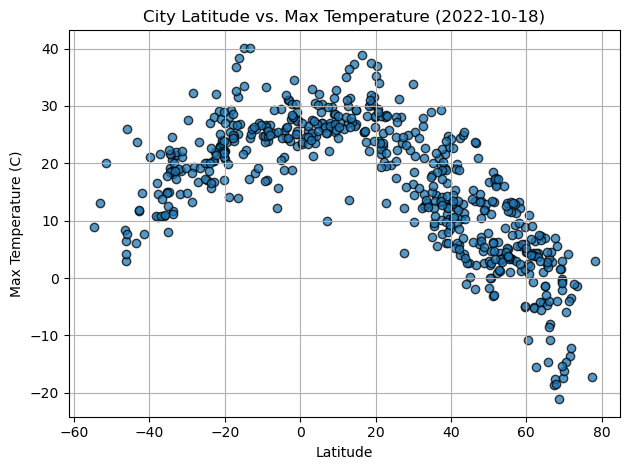

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

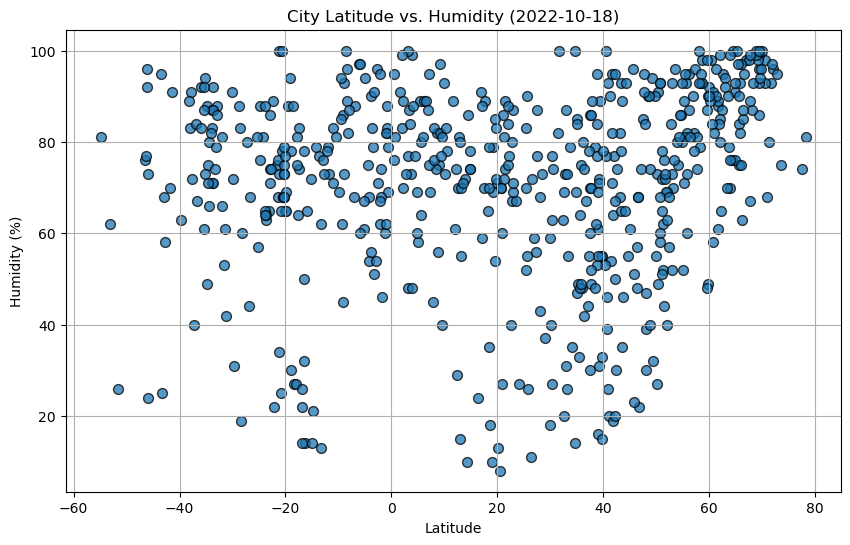

In [35]:
# Build the scatter plots for latitude vs. humidity

plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75, s=50)

# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity (2022-10-18)",)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

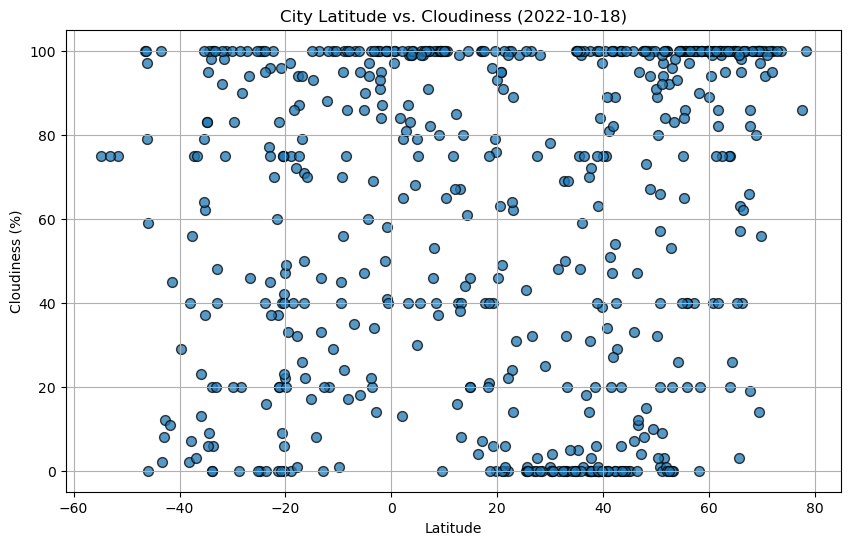

In [37]:
# Build the scatter plots for latitude vs. cloudiness

plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75, s=50)

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

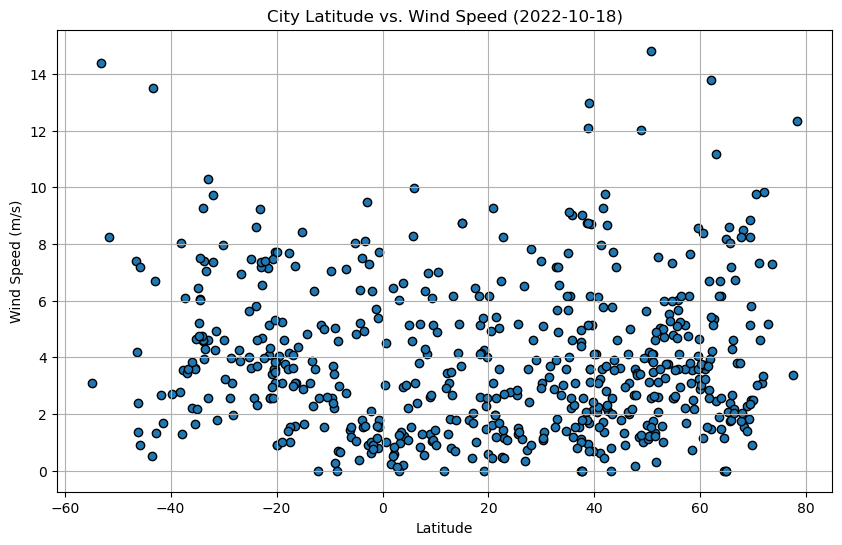

In [39]:
# Build the scatter plots for latitude vs. wind speed

plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots

def regress_line(x_axis,y_axis):
    slope, intercept, r_value, p, se = linregress(x_axis,y_axis)
    regressed_values = slope*(x_axis) + intercept
    
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regressed_values, "r-")
    
    return slope, intercept, r_value


In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

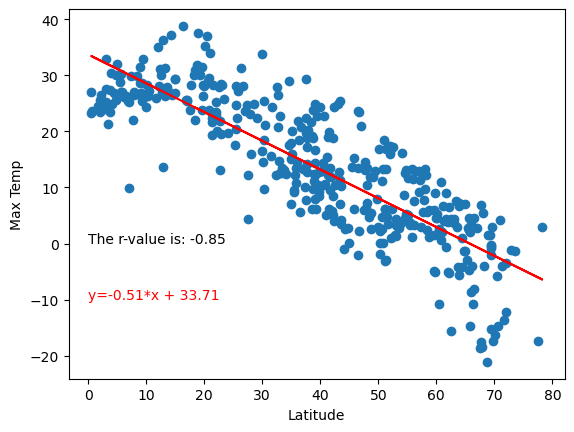

In [75]:
# Linear regression on Northern Hemisphere

slope, intercept,r_value =regress_line(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(f"The r-value is: {round(r_value,2)}",xy= (0,0),color = "black")
plt.annotate(f"y={round(slope,2)}*x + {round(intercept,2)}", xy=(0,-10), color ="red")

plt.show()


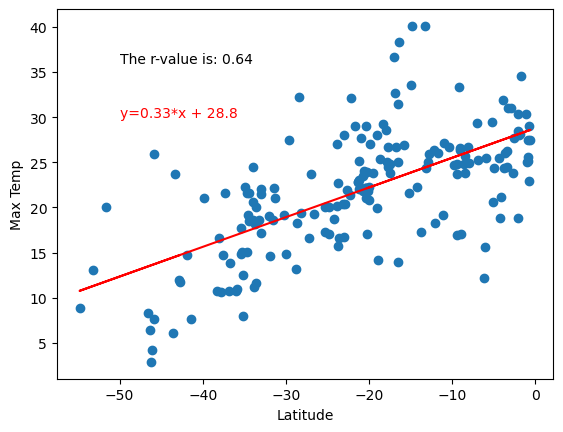

In [76]:
# Linear regression on Southern Hemisphere

slope, intercept,r_value =regress_line(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(f"The r-value is: {round(r_value,2)}",xy= (-50, 36),color = "black")
plt.annotate(f"y={round(slope,2)}*x + {round(intercept,2)}", xy=(-50, 30), color ="red")

plt.show()


**Discussion about the linear relationship:** Overall, this analysis provides insights into the general trend between latitude and maximum temperature. If the location is closer to equator, the hotter temperture we get.

### Humidity vs. Latitude Linear Regression Plot

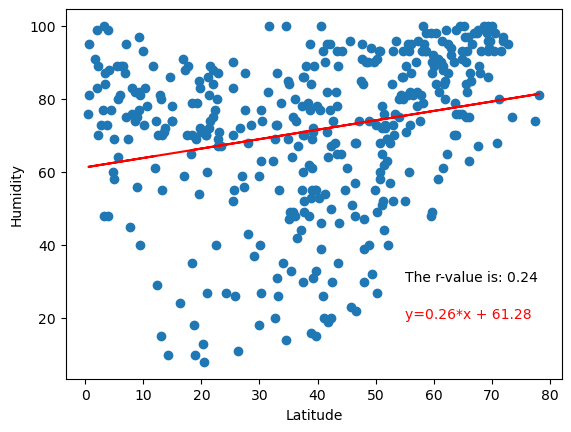

In [77]:
# Northern Hemisphere

slope, intercept,r_value =regress_line(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(f"The r-value is: {round(r_value,2)}",xy= (55,30),color = "black")
plt.annotate(f"y={round(slope,2)}*x + {round(intercept,2)}", xy=(55,20), color ="red")


plt.show()

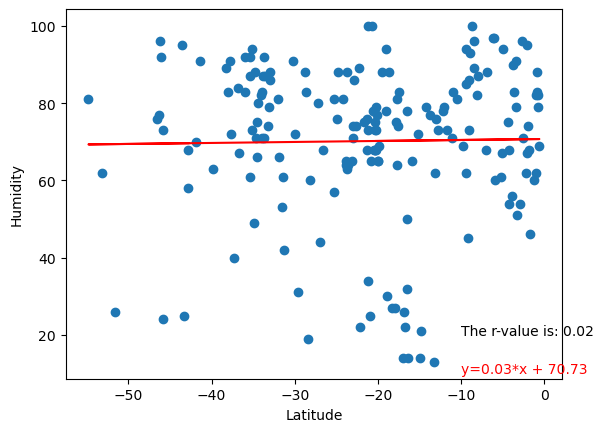

In [73]:
# Southern Hemisphere

slope, intercept,r_value =regress_line(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(f"The r-value is: {round(r_value,2)}", xy= (-10,20), color = "black")
plt.annotate(f"y={round(slope,2)}*x + {round(intercept,2)}", xy= (-10,10), color ="red")

plt.show()


**Discussion about the linear relationship:** There is an obivous data sight in these two graphic. The r value is almost 0 in southern hemisphere and the reson may be the ocean area in southern hemisphere is more than north part of Earth.

### Cloudiness vs. Latitude Linear Regression Plot

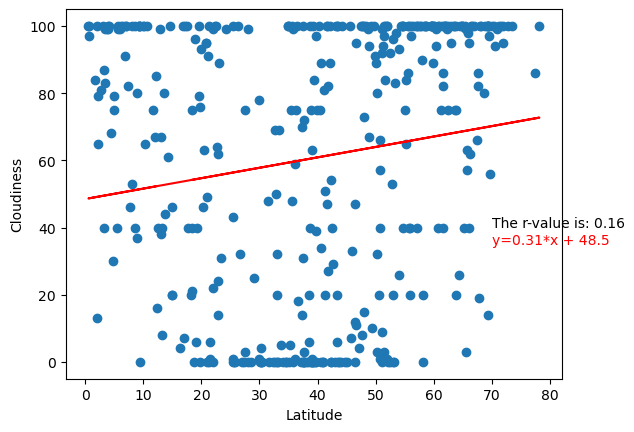

In [79]:
# Northern Hemisphere

slope, intercept,r_value =regress_line(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(f"The r-value is: {round(r_value,2)}", xy= (70, 40), color = "black")
plt.annotate(f"y={round(slope,2)}*x + {round(intercept,2)}", xy=(70, 35), color ="red")


plt.show()

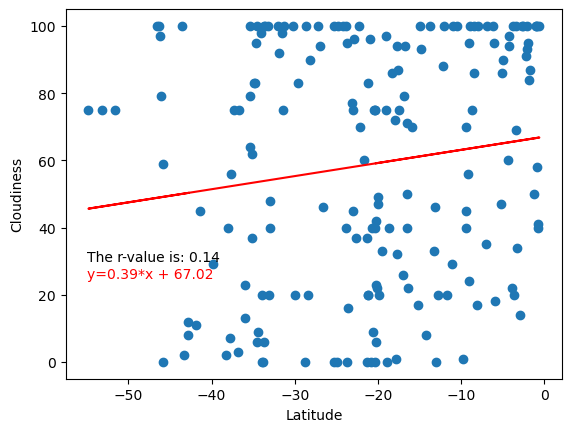

In [83]:
# Southern Hemisphere

slope, intercept,r_value =regress_line(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(f"The r-value is: {round(r_value,2)}", xy= (-55,30),color = "black")
plt.annotate(f"y={round(slope,2)}*x + {round(intercept,2)}", xy= (-55,25), color ="red")

plt.show()

**Discussion about the linear relationship:** The data of northern and southern hemisphere cloudiness are similar to each other. Need other factors to support the data otherwise there is no clue show that they are connected. 

### Wind Speed vs. Latitude Linear Regression Plot

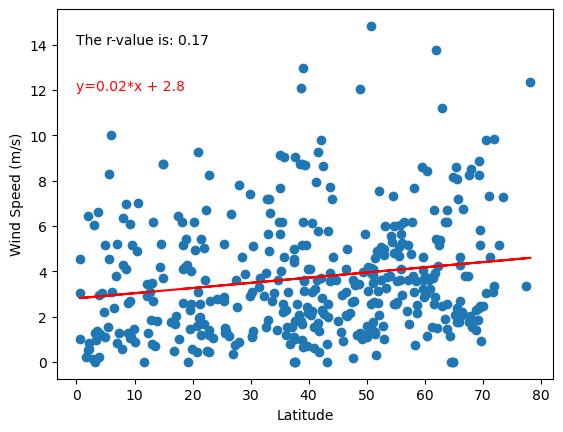

In [84]:
# Northern Hemisphere

slope, intercept,r_value =regress_line(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(f"The r-value is: {round(r_value,2)}", xy= (0,14),color = "black")
plt.annotate(f"y={round(slope,2)}*x + {round(intercept,2)}", xy= (0,12), color ="red")

plt.show()

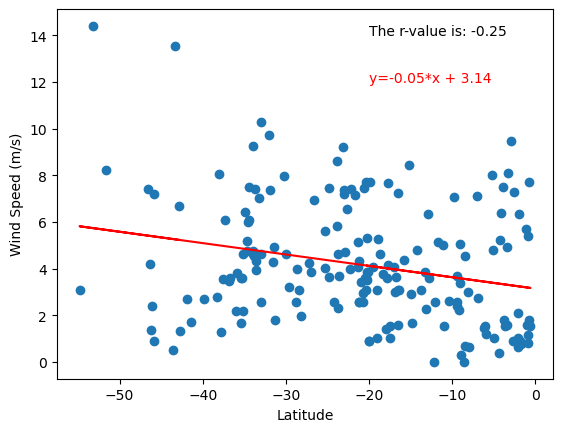

In [85]:
# Southern Hemisphere

slope, intercept,r_value =regress_line(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(f"The r-value is: {round(r_value,2)}",xy= (-20,14),color = "black")
plt.annotate(f"y={round(slope,2)}*x + {round(intercept,2)}", (-20,12), color ="red")

plt.show()


**Discussion about the linear relationship:** The relationship between wind Speed and latitude is not strong enough to prove any point. However, we still can see the southern hemisphere average wind speed is heigher perhaps ocean surface area is the major factor that influence wind speed.